<a href="https://colab.research.google.com/github/atharvnr/AiMlBootcamp/blob/main/Copy_of_3_MachineLearning_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to Machine Learning

# Traditional computing approaches to problem solving

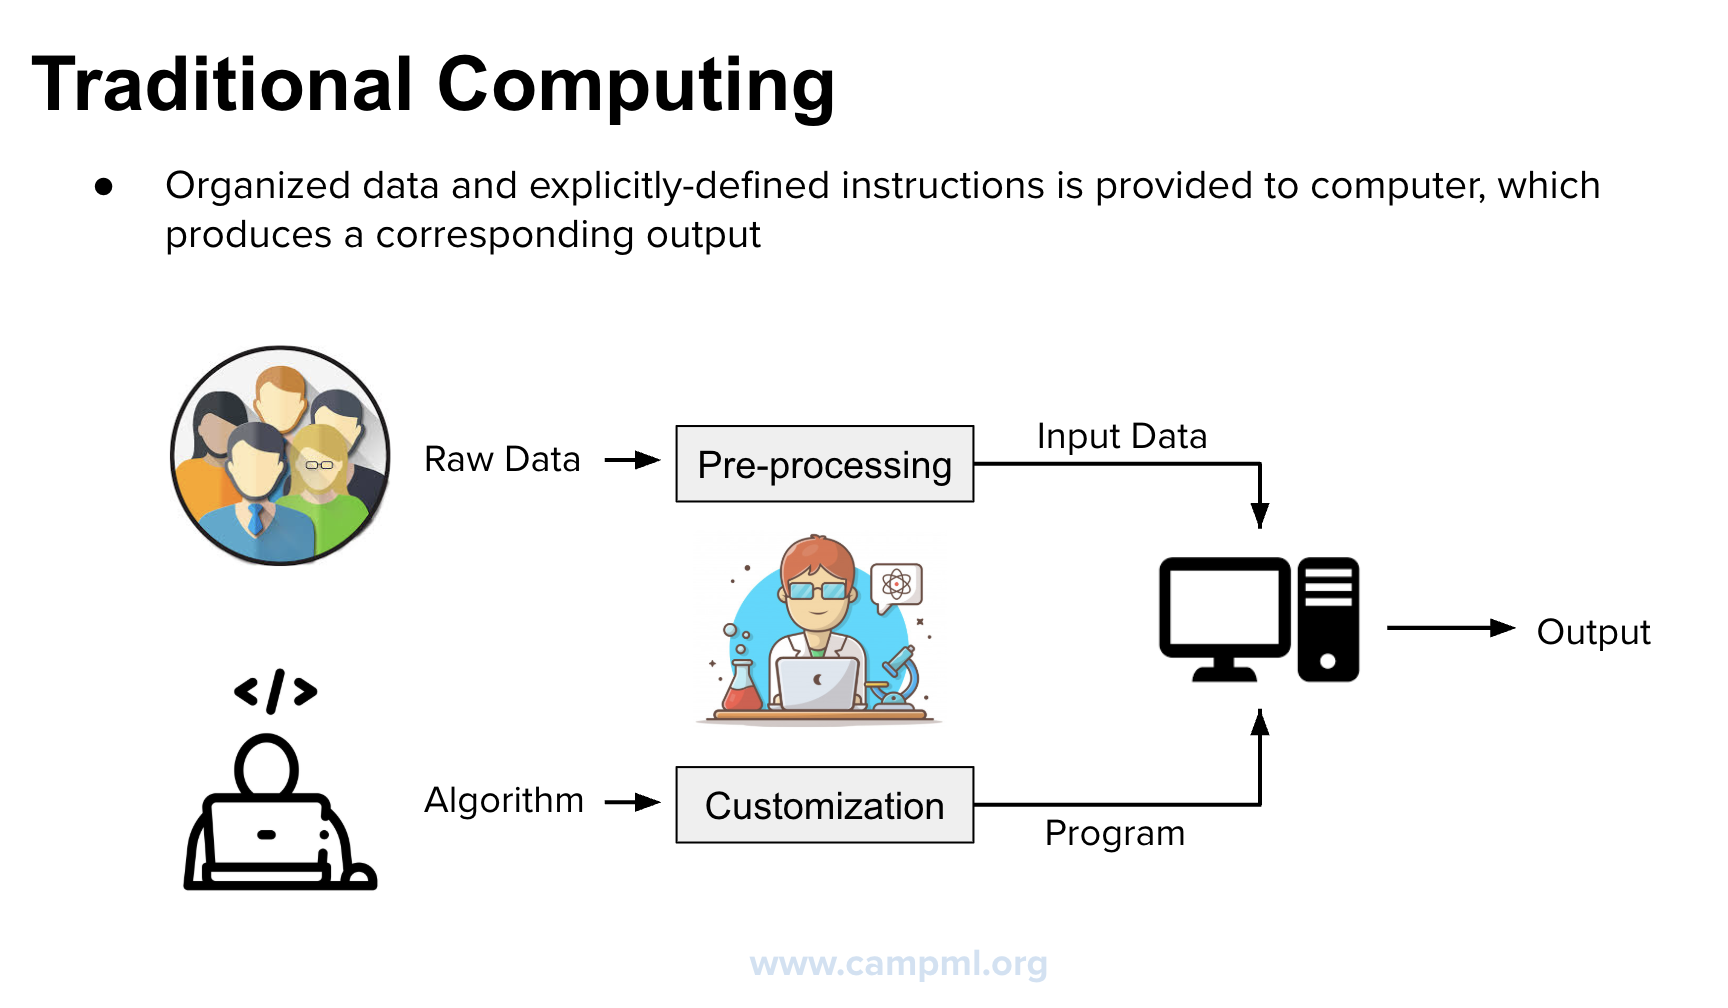

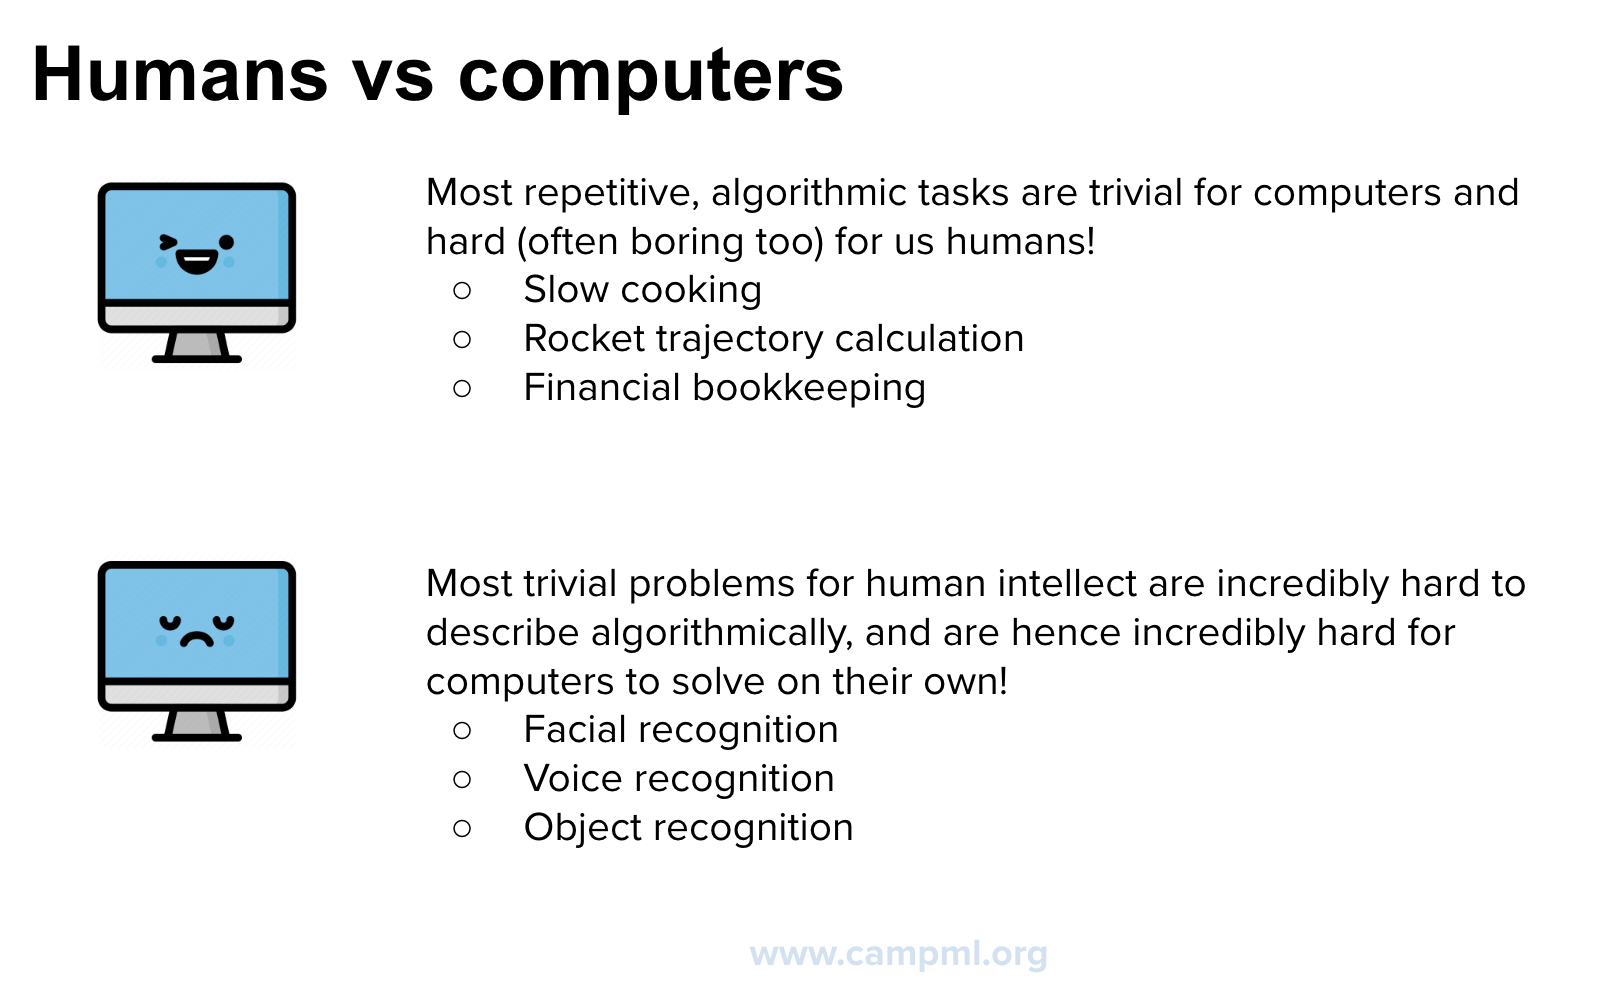

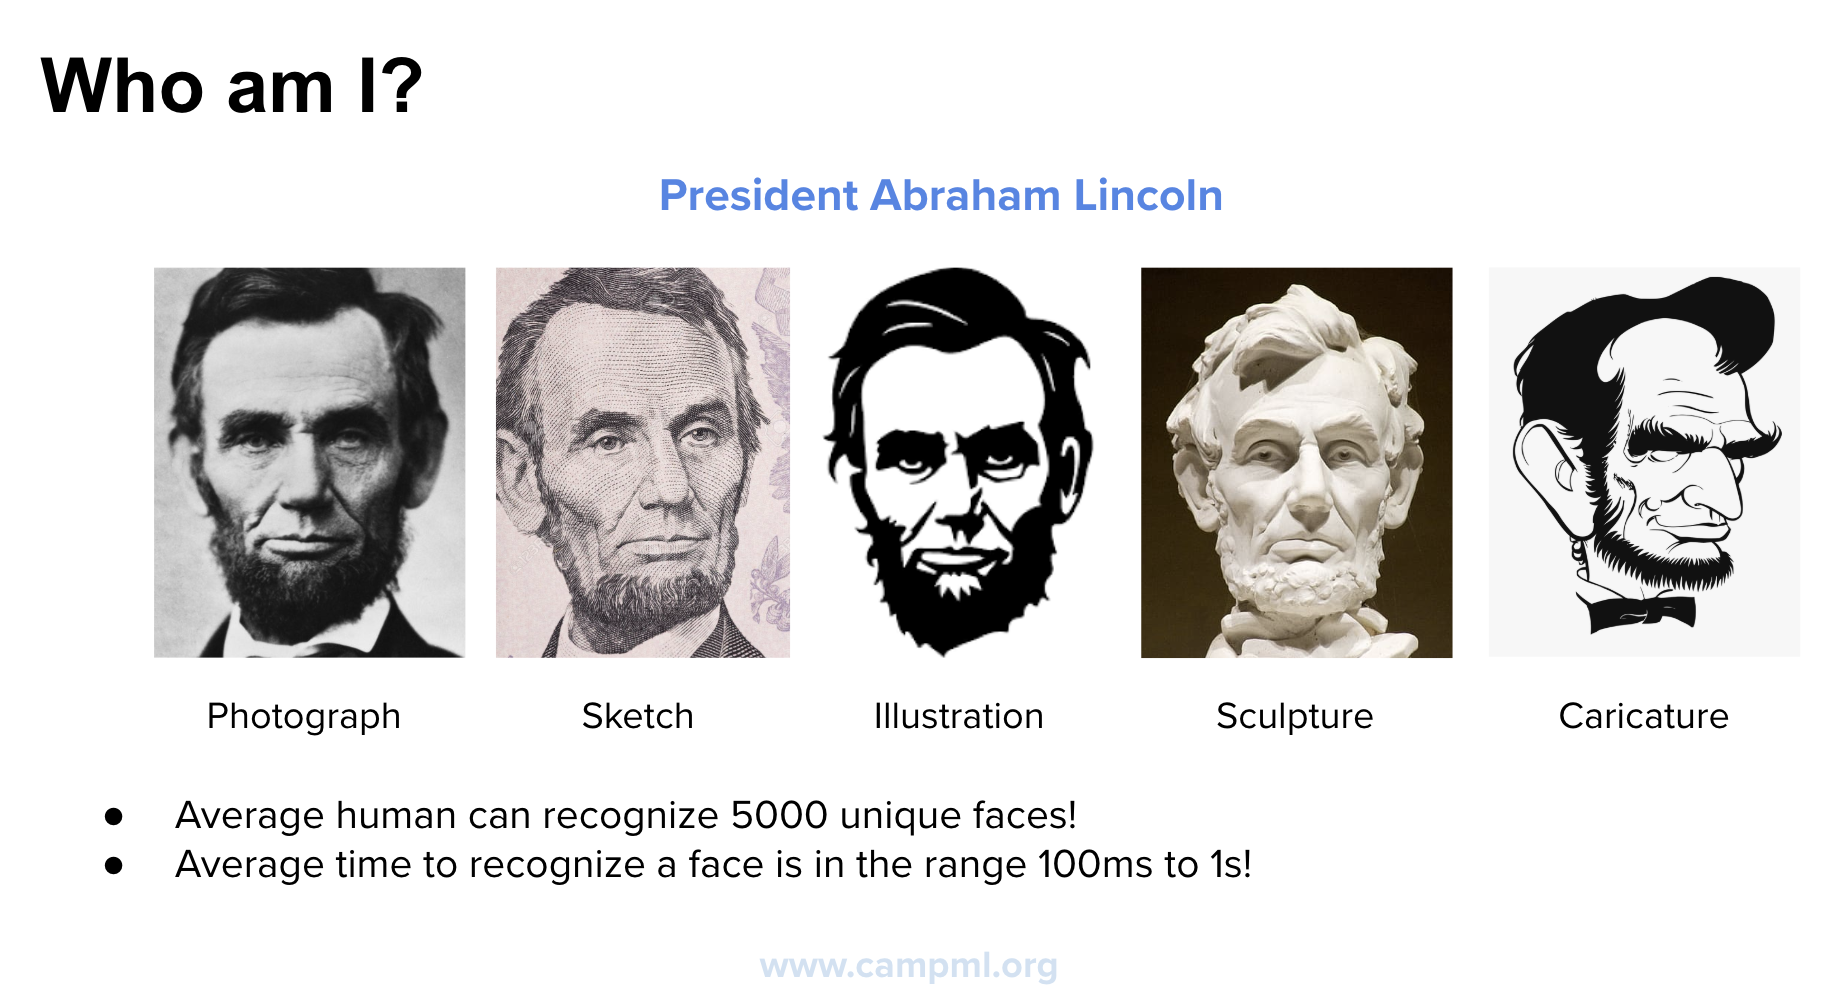

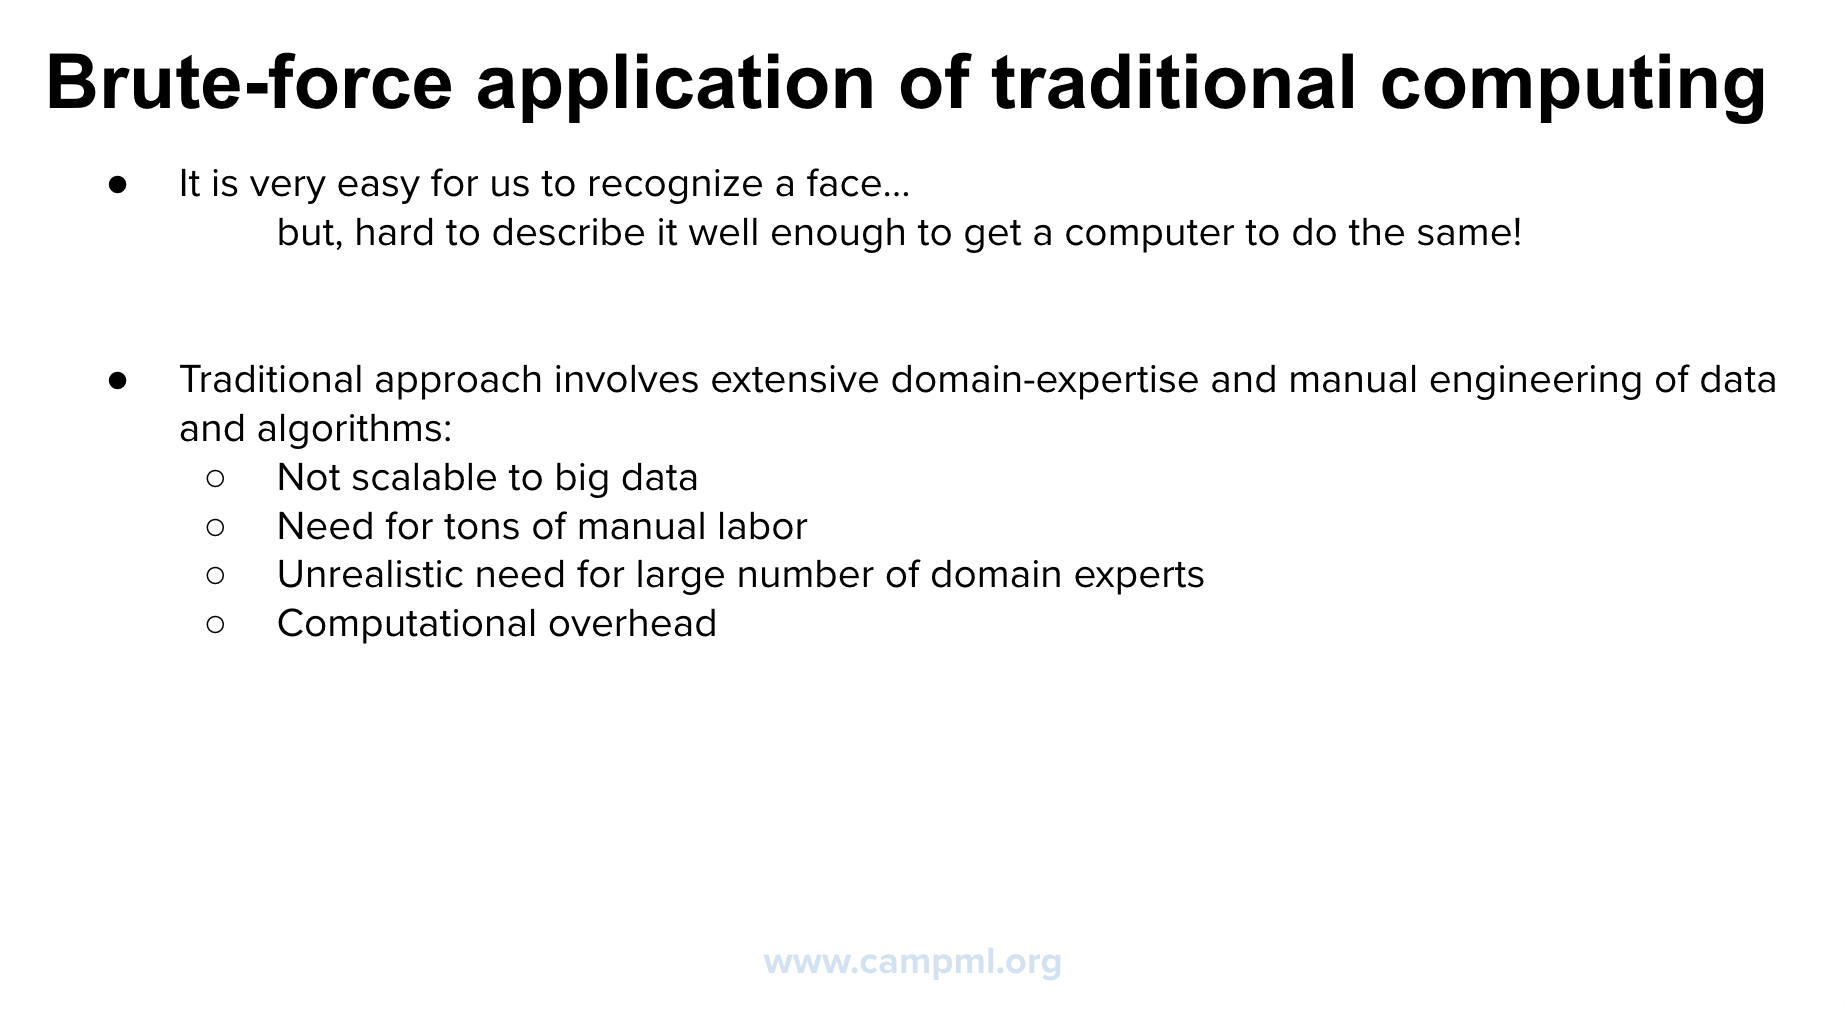

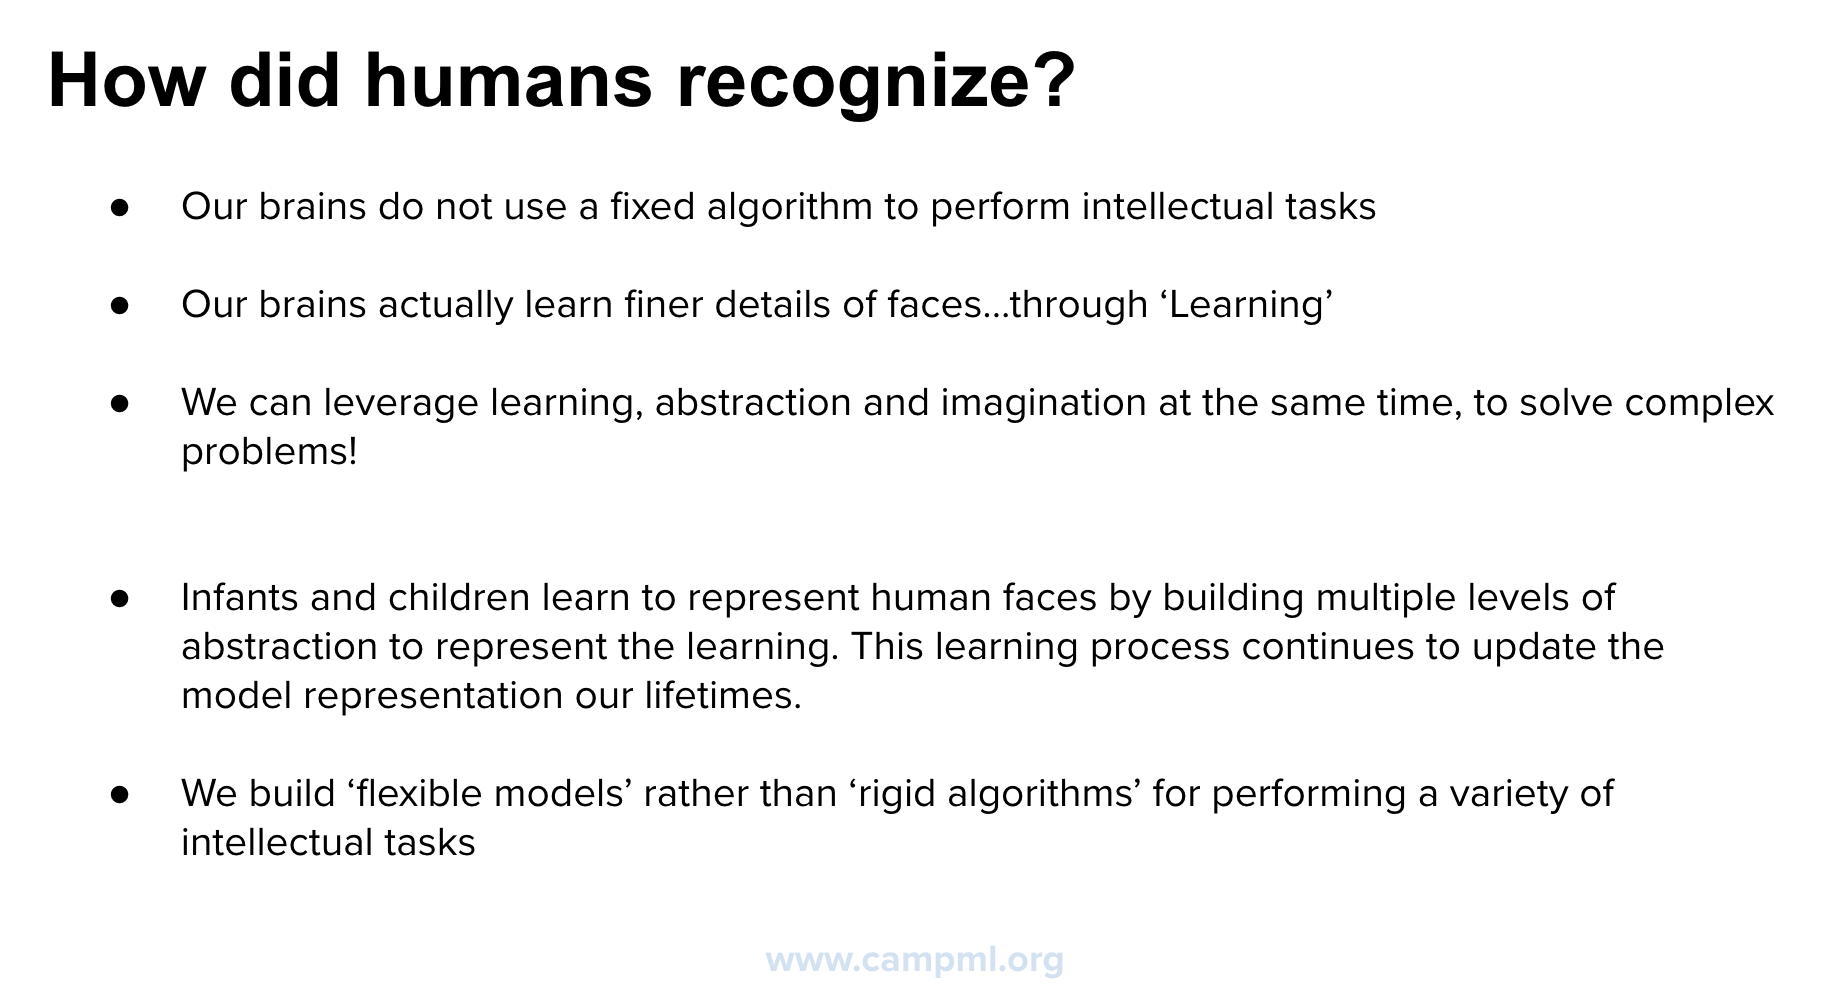

### Enter Machine Learning

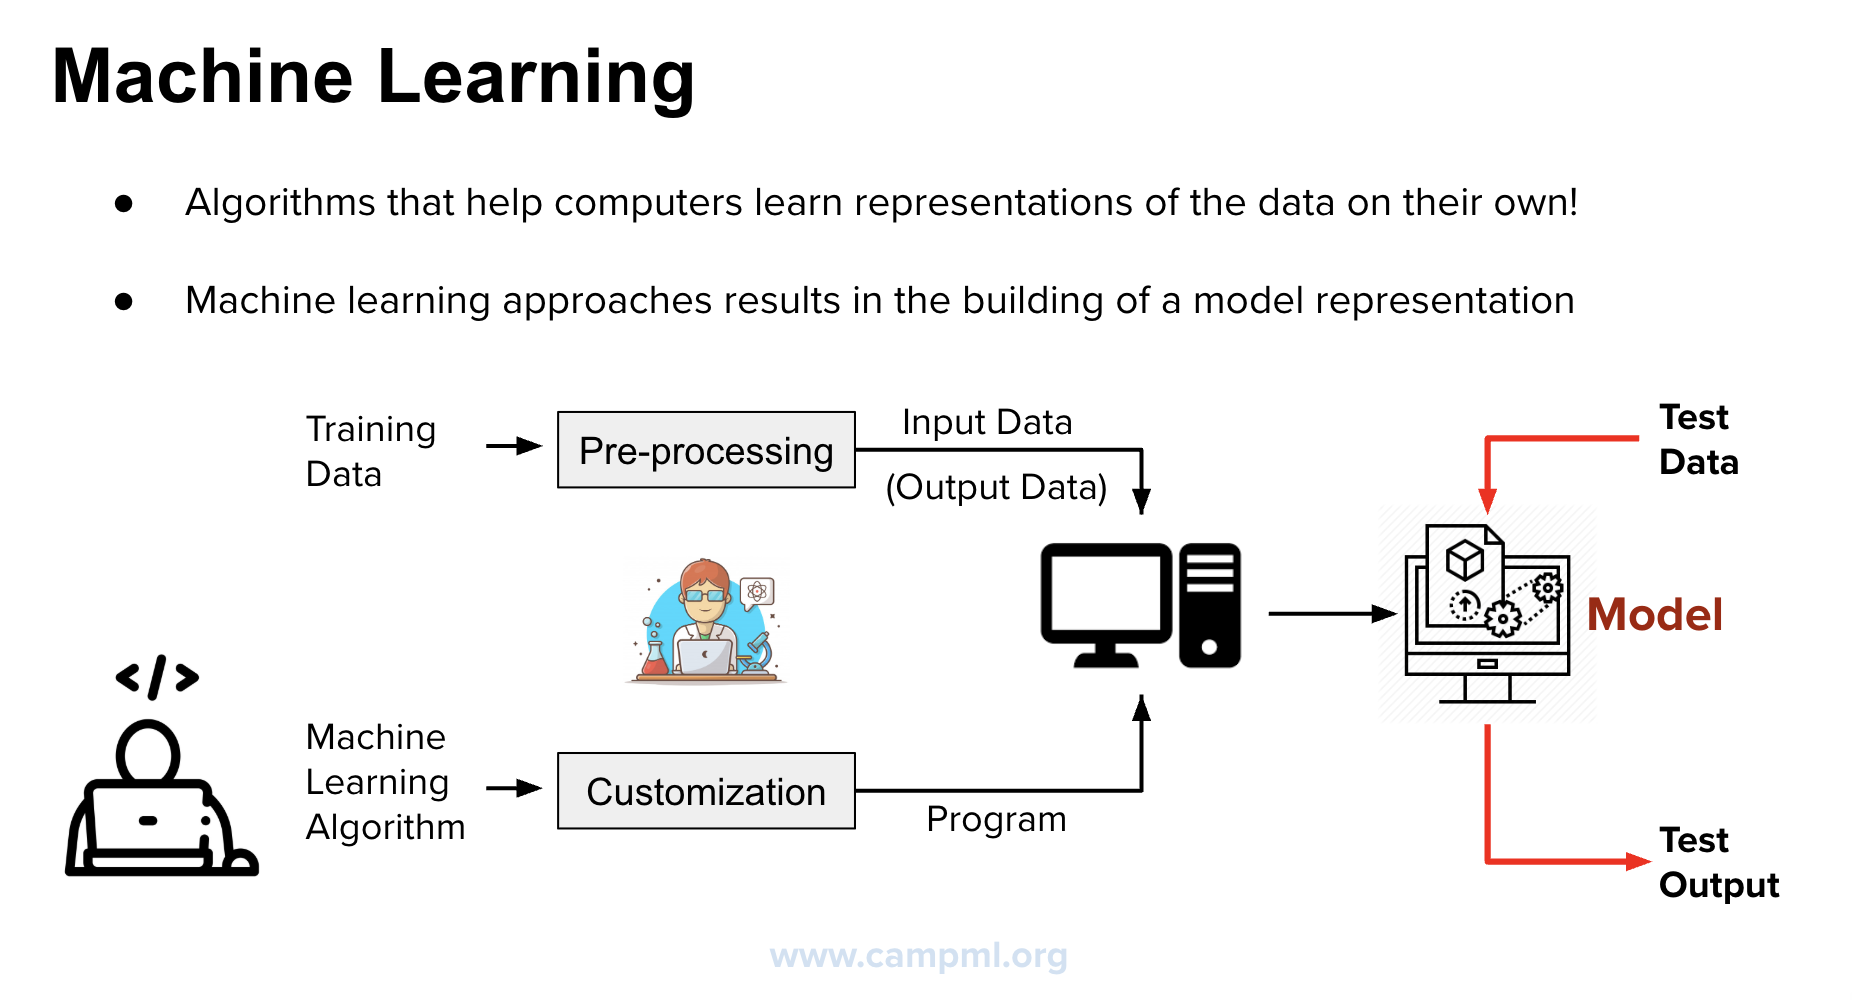

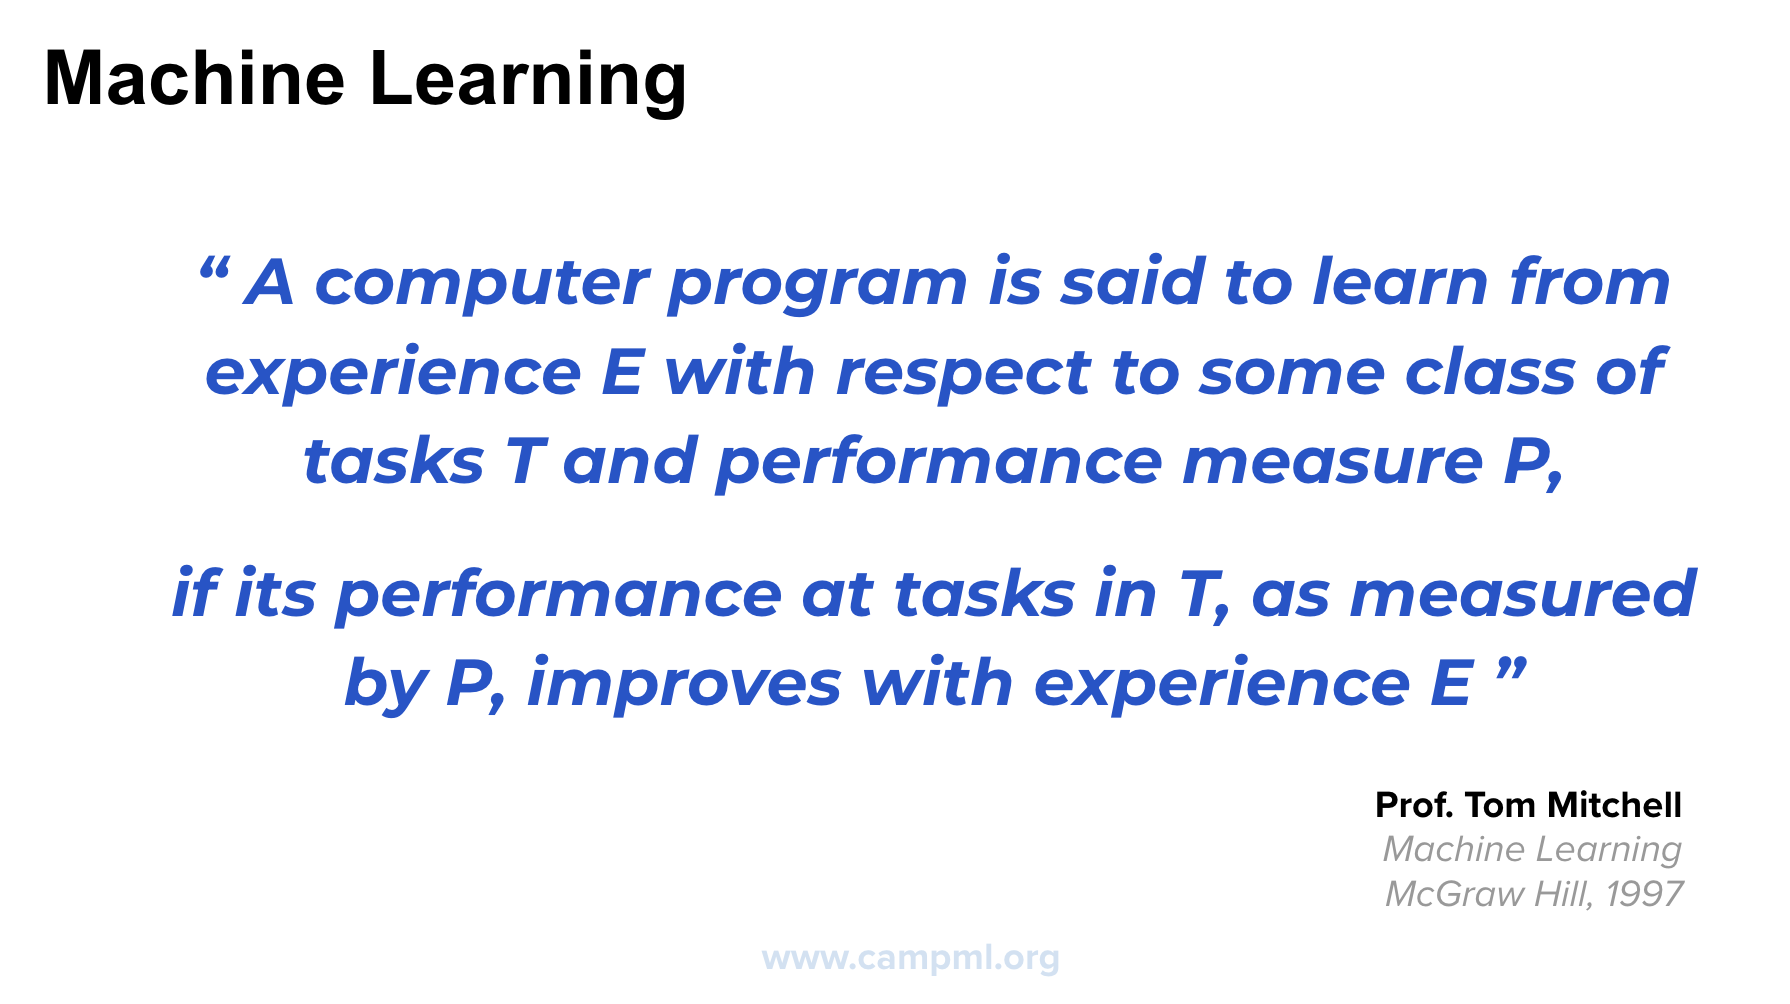

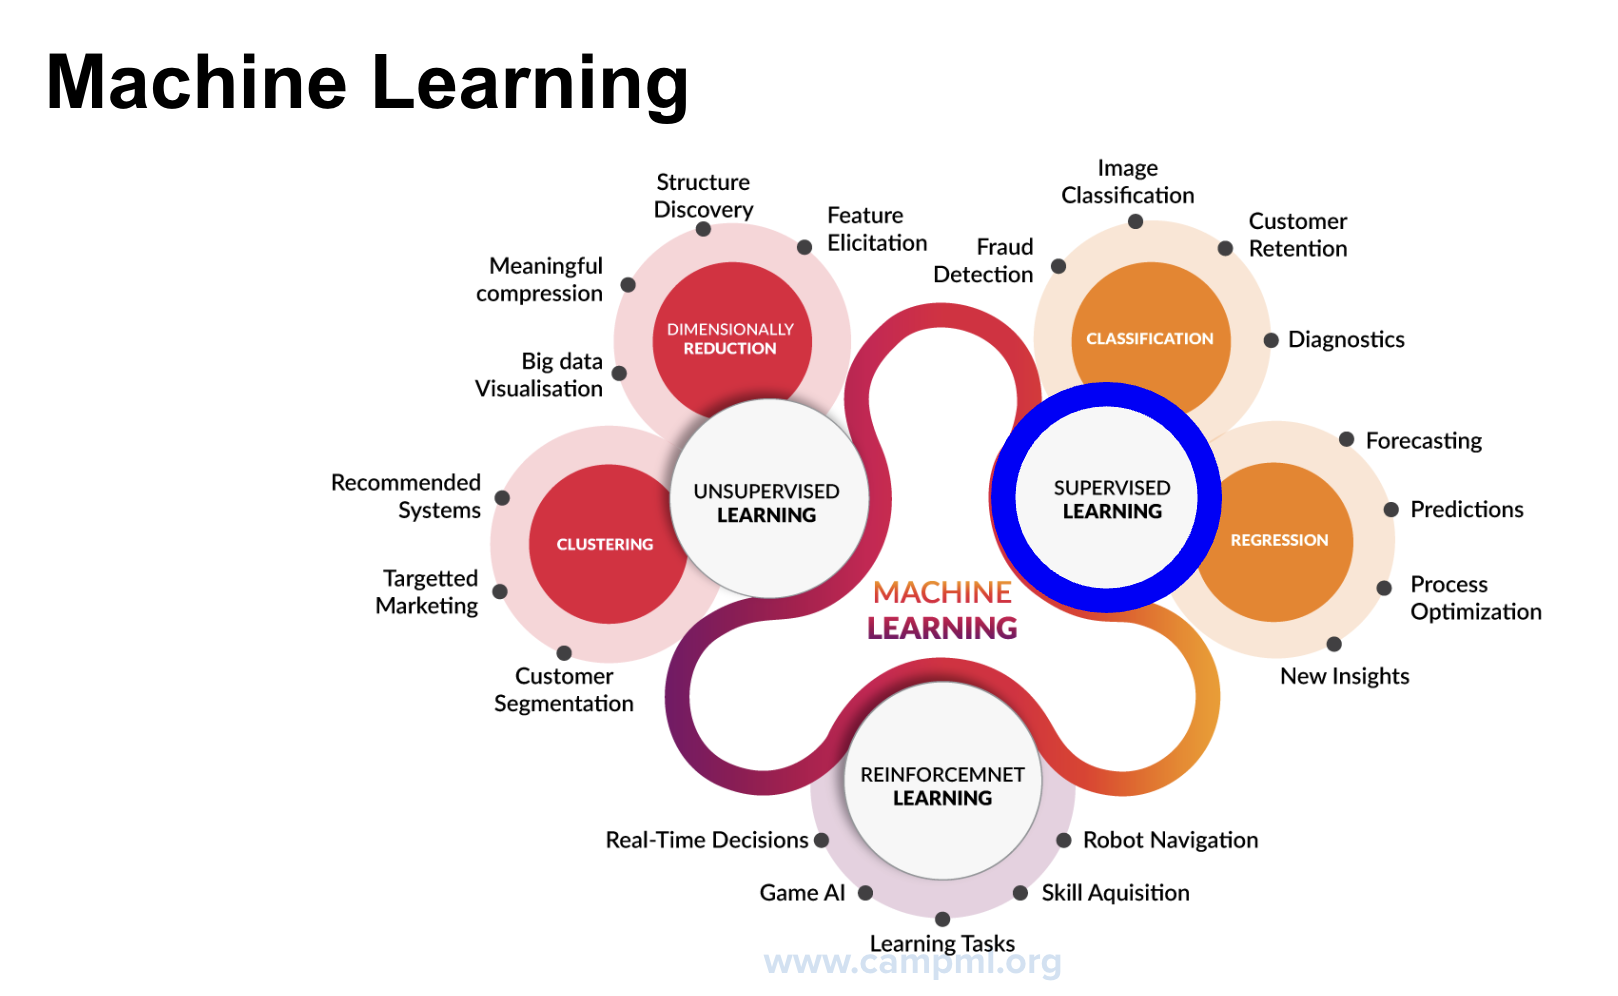

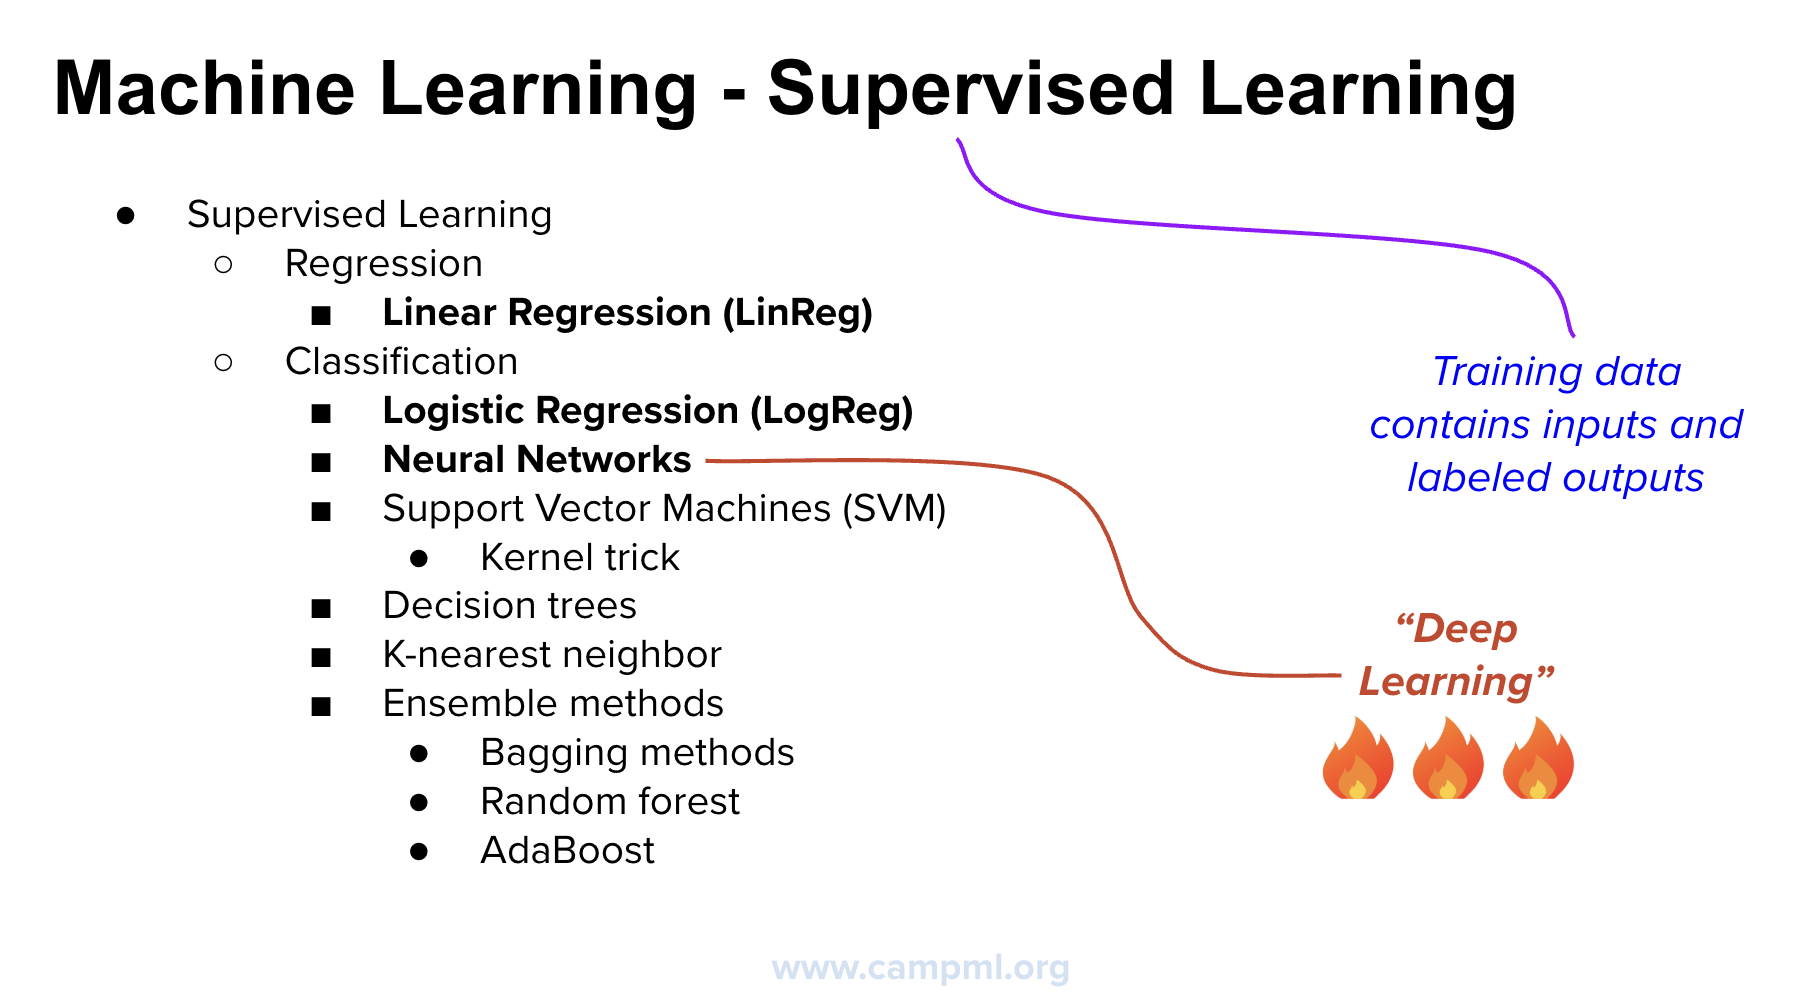

In [ ]:
# import libraries
%matplotlib inline
import sys
import numpy as np
import scipy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn import datasets
from sklearn import preprocessing

In [ ]:
print("Linear Regression using Scikit Learn\n")

#Generate testdata using multivariate normal distribution
np.random.seed = 10
num_observations = 1000

#numpy.random.multivariate_normal(mean, cov[, size, check_valid, tol])
data = np.random.multivariate_normal([2, 1, 4], [[2, 6, 5],[.1, .1, .1],[.1,.1,.1]], num_observations)
X = data[:,0:1]
y = data[:,2]

print(X.shape, y.shape)

plt.figure(figsize=(10,8))
plt.xlabel('X')
plt.ylabel('y')
plt.title('Example Dataset')
plt.scatter(X,y,c = "red",alpha = 0.8,s=10)

plt.xticks()
plt.yticks()
plt.grid(True)

plt.show()

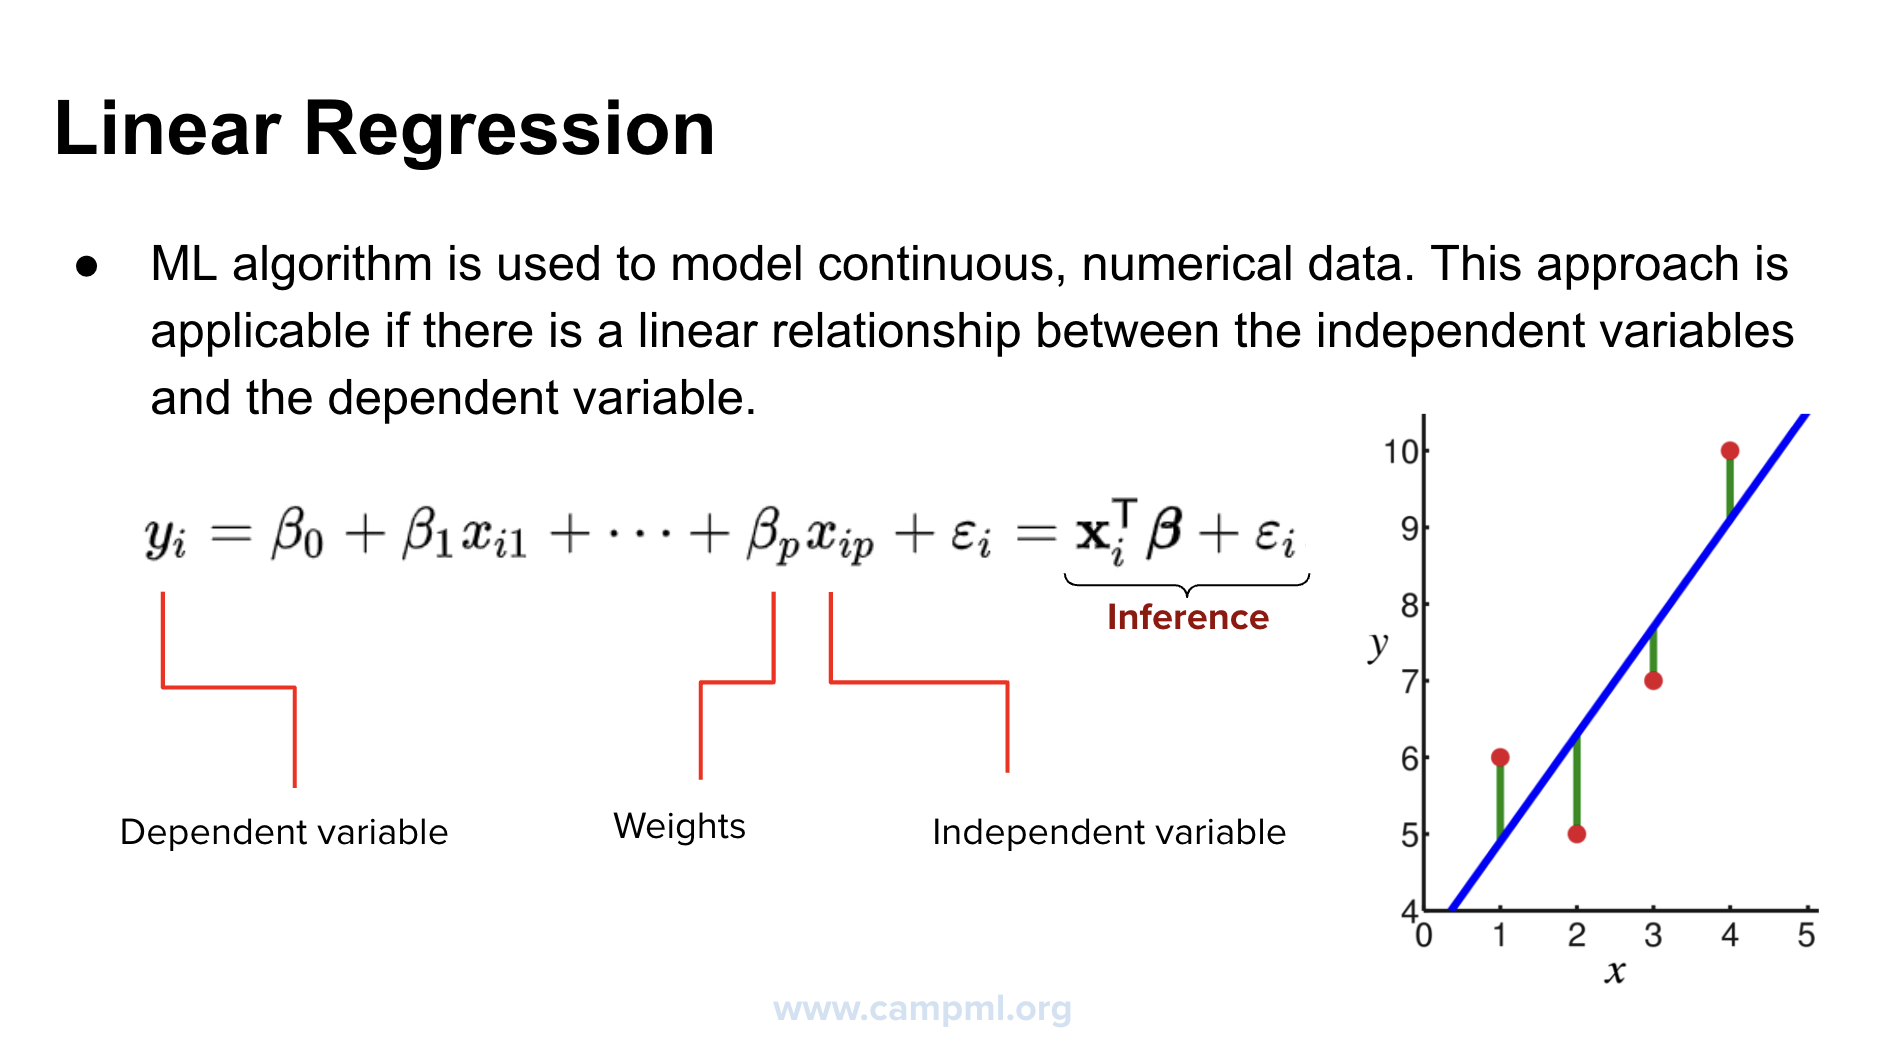

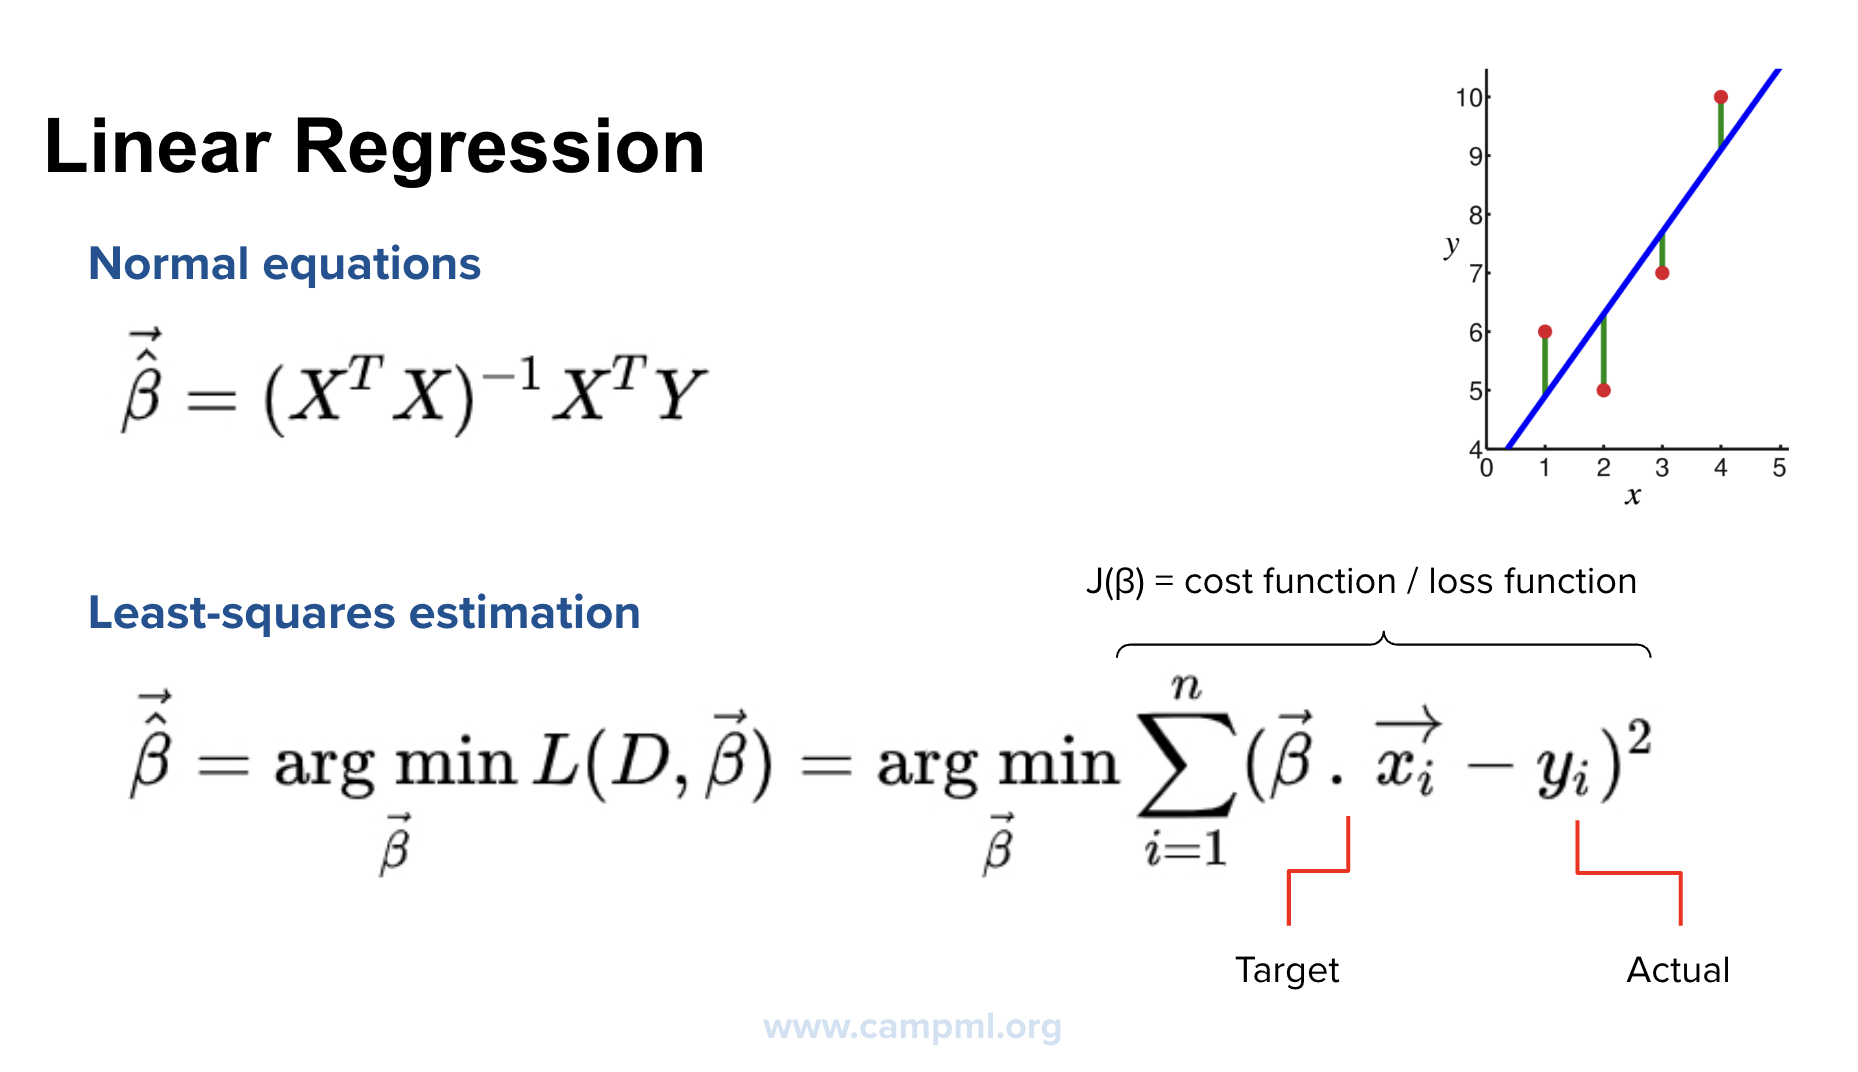

In [ ]:
linReg = linear_model.LinearRegression()
reg=linReg.fit(X, y)
y_pred = reg.predict(X)

print("Regression score (R^2) = ",reg.score(X, y))
print("Regression coefficient = ",reg.coef_)
print("Regression intercept= ",reg.intercept_)

print(X.shape, y.shape)

plt.figure(figsize=(10,8))
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.scatter(X,y,c = "red",alpha = 0.8,s=10)

plt.plot(X, y_pred, color='blue', linewidth=1)

plt.xticks()
plt.yticks()
plt.grid(True)

plt.show()

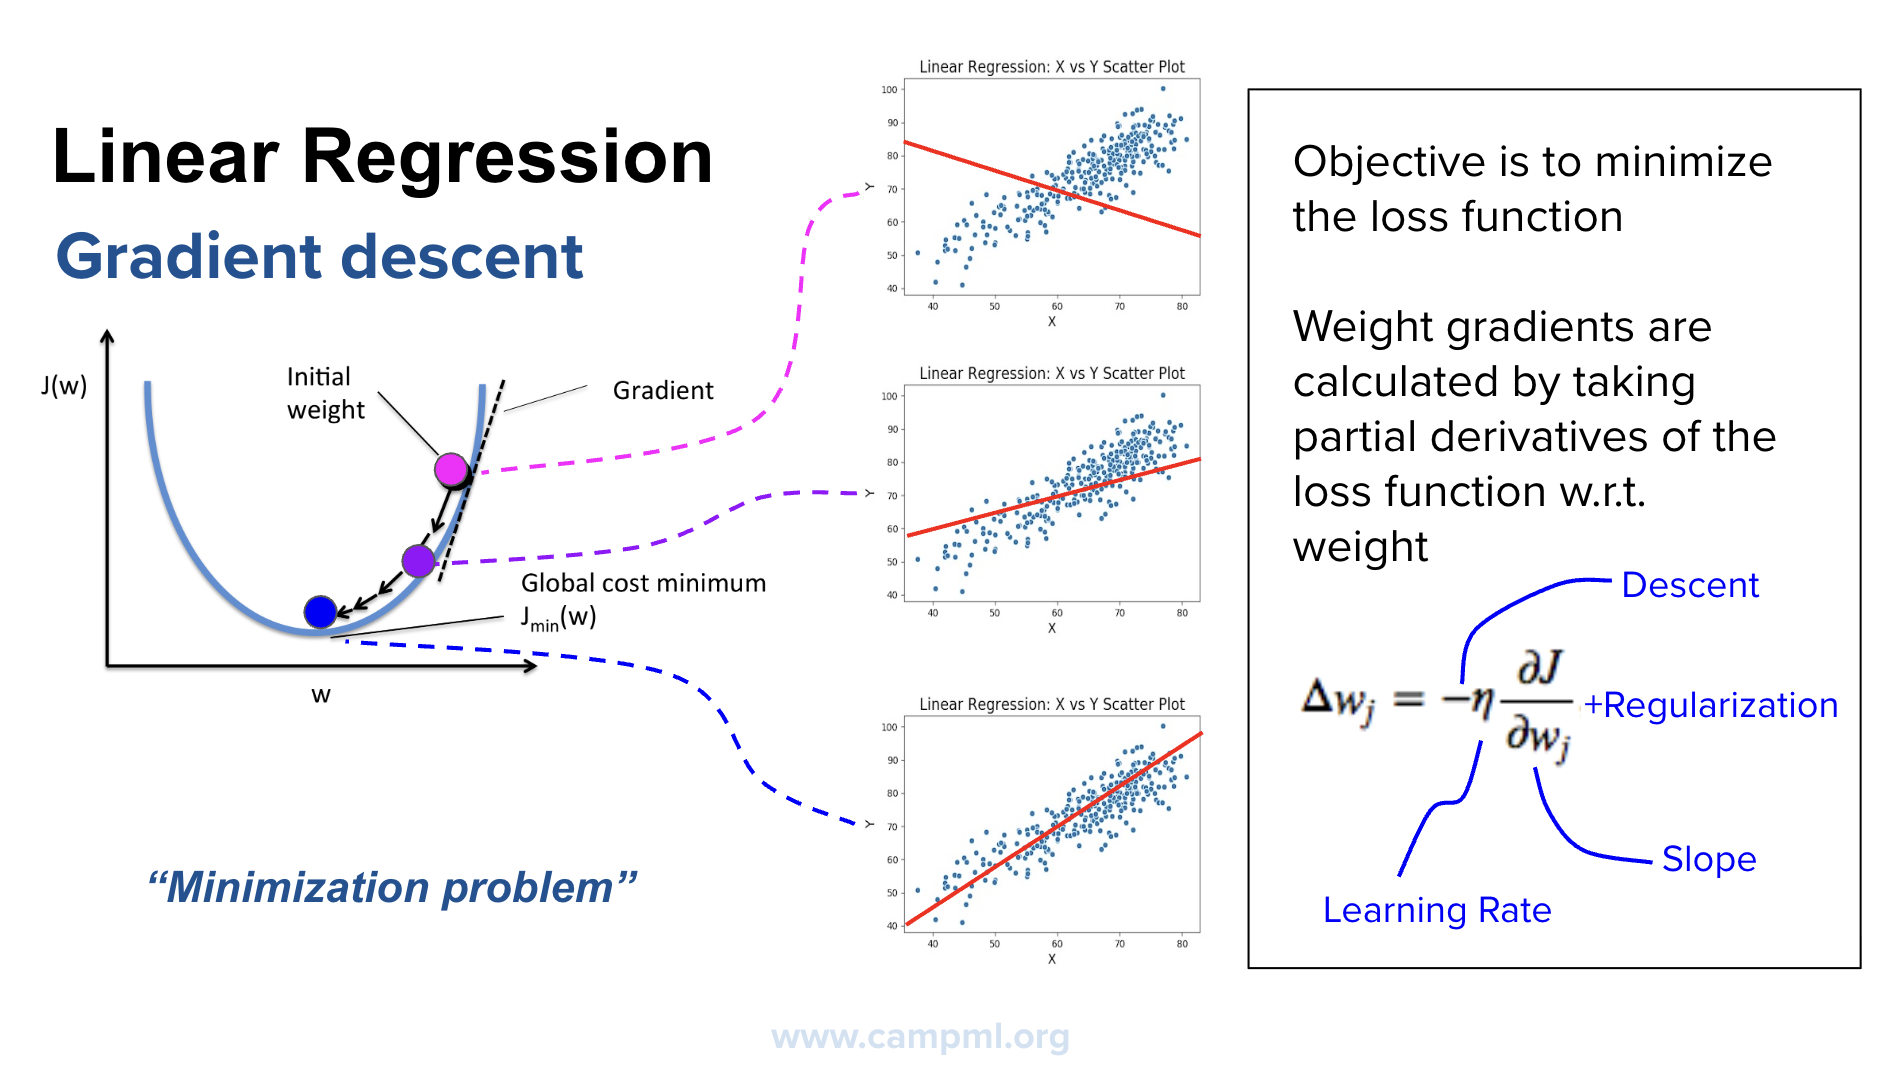

$$Cost = (1/N) * \sum (y_i - (wx + b))^2$$

---

Taking partial derivatives:
$$\frac{d(Cost)}{dw} = -2* (1/N) * \sum (y_i - (wx + b)) * x $$

$$\frac{d(Cost)}{db} = -2* (1/N) * \sum (y_i - (wx + b)) $$

In [ ]:
verbose = 0

learningRate = 0.015 #@param {type:"slider", min:0, max:0.1, step:0.001}
numEpochs = 100 #@param {type:"slider", min:0, max:200, step:5}

# np.random.seed = 123
# w_init = np.random.random(1)
# b_init = np.random.random(1)

w_init = [0.034]
b_init = [0.036]

#Data needs to be pre-processed
X = (X - X.mean())/ X.std()
y = (y - y.mean())/ y.std()

In [ ]:
def LinReg_GradDes(X,y,w,b,epochs,learnRate):
  costHistory=[]
  epochHistory=[]
  print("Linear regression using gradient descent")
  N = float(len(y))
  for i in range(epochs):
    y_pred = np.dot(X,w) + b
    error = y - y_pred
    cost = (1/N) * np.sum(error**2)
    w_gradient = -(2/N) * np.sum(np.dot(error,X))
    b_gradient = -(2/N) * np.sum(error)
    w = w - (learnRate * w_gradient)
    b = b - (learnRate * b_gradient)
    costHistory.append(cost)
    epochHistory.append(i)
    # print("Cost:",cost)
    # print("Weight: ",w)
    # print("Bias: ",b)
  return w, b, costHistory, epochHistory

In [ ]:
def plotter_loss_epoch(cost,epochs):
  plt.figure(figsize=(7,5))
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.title('Loss vs Epochs')
  plt.scatter(epochs,cost,c = "red",alpha = 0.8,s=50)
  plt.plot(epochs, cost, color='black', linewidth=2)

  plt.xticks()
  plt.yticks()
  plt.grid(True)

  plt.show()

In [ ]:
def plotter_linReg(X,y_init,y_pred):
  plt.figure(figsize=(7,5))
  plt.xlabel('X')
  plt.ylabel('y')
  plt.title('Linear Regression')
  plt.scatter(X,y,c = "red",alpha = 0.8,s=10)

  plt.plot(X, y_pred, color='red', linewidth=3, linestyle='solid')
  plt.plot(X, y_init, color='blue', linewidth=3, linestyle='solid')

  plt.xticks()
  plt.yticks()
  plt.grid(True)

  plt.show()

In [ ]:
if verbose:
  plt.figure(figsize=(7,5))
  plt.xlabel('X')
  plt.ylabel('y')
  plt.title('Linear Regression with gradient descent')
  plt.scatter(X,y,c = "black",alpha = 0.8,s=10)

  y_init = (w_init*X) + b_init
  plt.plot(X, y_init, color='red', linewidth=1)

  plt.xticks()
  plt.yticks()
  plt.grid(True)

  plt.show()

#Linear Regression with Gradient Descent
weight, bias, cost, epochs = LinReg_GradDes(X,y,w_init,b_init,numEpochs,learningRate)

if verbose:
  print("Cost: ",cost)
  print("Weight: ",weight)
  print("Bias: ",bias)

#Initial and final prediction
y_init = (w_init*X) + b_init
y_pred = (weight*X) + bias

#Plot Linear Regression
plotter_linReg(X,y_init,y_pred)

#Plot Loss vs Epochs
plotter_loss_epoch(cost,epochs)
